# **Lending Club Case Study**
Team : Vikas Dadhich, Vinayak SG
Date : 22 May 2024


We have a dataset **loan.csv** The data given below contains information about past loan applicants and whether they ‘defaulted’ or not.
### **Business understanding**
The data is shared to make decision after reciving the application basd on Applicant profile. This involves Risk factors based on loss to the company, If a candidate repay the loan ammount or not.

We need to understand if an applicant is defaulted or non-defaulted based on the data for past loan application.
We need to find the person is likely to defauled based on we can define our below actions to avoid Risks.


*   Denying loan
*   Reducing loan Amount
*   Lending at highest interest rate


We need to collect data based on consumer attribute and loan attributes.

### **Business Goal**
Reduce the risk and make sure collect the data in to take decision on the loan application to avoid financial loss.

Note: the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.




# **EDA Analysis** (Data Sourcing)




#Importing libraries for the EDA Analysis

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing warnings to avoid warnings
import warnings
warnings.filterwarnings("ignore")

#Import data from source file and read it
*Note: Use google collab and make sure you upload the loan.csv file to the collab python drive by opening foler lin and "upload" button*

In [2]:
#Importing data to panda datafram df
loan=pd.read_csv('loan.csv')
#Check the pandas dataframe
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


**Observation**
*   We can see the name of the columns
*   Af first sights we do see there are many columns with NaN values



#Validate the dataframe (loan)

In [3]:
#Get the info for the dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


**Observation**
*   39717 entries
*   Total 111 columns
*   Involces fload,int and object(string) data types
*   Data size is: 33.6+MB



In [4]:
#Check the dataframe shape with raws and columns
loan.shape

(39717, 111)

In [5]:
#Chekc datatypes
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

Note: Just to be more clear shape confirms that the total entries and columns are 39717,111 respectively  

# **EDA Analysis** (Data Cleaning)



In [6]:
#Check footer for the dataframe
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### **Validate Raws and Columns**

Check For Duplicates

In [7]:
#Check for duplicates
loan[loan.duplicated(keep=False)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


**Observation: No duplicates**

Check for empty rows

In [8]:
#Check number of empty rows
loan.isnull().all(axis=1).sum()

0

**Observation: No empty rows**

Check for empty columns

In [9]:
#Check number of empty coulms
loan.isnull().all(axis=0).sum()

54

**Observation: There are 54 empty columns**

### **Missing Values**

Delete NULL Columns

In [10]:
#Pull oll the null values column in new dataframe as "null_columns"
null_columns = loan.columns[loan.isnull().all()]

In [11]:
#Delete all the null value columns caputed under "null_columns" dataframe
loan.drop(null_columns, axis=1, inplace=True)

In [12]:
loan.isnull().all(axis=0).sum()

0

**Check for other NULL values**

In [13]:
#Check for the NULL values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

**Filtering the most null values for Columns**

In [14]:
remaining_null=loan.isnull().sum()

In [15]:
#Check remaining NULL values more than '0'
remaining_null[remaining_null>0].sort_values()

last_credit_pull_d                2
title                            11
tax_liens                        39
revol_util                       50
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
last_pymnt_d                     71
pub_rec_bankruptcies            697
emp_length                     1075
emp_title                      2459
desc                          12942
mths_since_last_delinq        25682
mths_since_last_record        36931
next_pymnt_d                  38577
dtype: int64

**Observation**
*   Below are the columns has more than 1000 null values
  * emp_length                     1075
  * emp_title                      2459
  * desc                          12942
  * mths_since_last_delinq        25682
  * mths_since_last_record        36931
  * next_pymnt_d                  38577
*   Below are the columns has less than 1000 null values
  * last_credit_pull_d                2
  * title                            11
  * tax_liens                        39
  * revol_util                       50
  * collections_12_mths_ex_med       56
  * chargeoff_within_12_mths         56
  * last_pymnt_d                     71
  * pub_rec_bankruptcies            697



**Define the Remaining Columns that needs to be removed as part of analysis**

In [16]:
#Remove 50% of the null values
loan = loan.loc[:,loan.isnull().sum()/loan.shape[0]*100<50]

In [17]:
#Check the laon shape after removing the 50% of the
loan.shape

(39717, 54)

In [18]:
#checking the null values accross the rows
loan.isnull().sum(axis=1).max()

6

Remove the column has unique values in the row, since single value in the column will not help with analysis

In [19]:
loan.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [20]:
loan = loan.loc[:,loan.nunique()>1]

**After removing unnessasary data we are validating null counts again**

In [21]:
loan.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12942
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

**After closely observing the above information we concluded that the below columns can be dropped**

In [22]:
# The columns removed are customer behaviour variables
loan=loan.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','installment','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1)
# Removing desc,emp_title,desc as they have no significance to the analysis these are random variables
loan=loan.drop(['title','emp_title','desc','url'],axis=1)
# Similarly other colums not contributes in analysis such as zip_code,member_id
loan=loan.drop(['zip_code'],axis=1)
loan=loan.drop(['member_id'],axis=1)
# Removing the funded_amnt_inc since it is something after loan approval.
loan=loan.drop(['funded_amnt_inv','funded_amnt'],axis=1)

Validate the null values again after removing the unnessasary columns

In [23]:
loan.isnull().sum()

id                         0
loan_amnt                  0
term                       0
int_rate                   0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
pub_rec_bankruptcies     697
dtype: int64

Need to fill the null value for **emp_length**

In [24]:
#This is for employement in Year and all values are in year, we need to check what can be the best fit value for it.
loan.emp_length.describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [25]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

**Employment length has 1015 missing values, that means either they are not employed or self-employed. But also, they have a good annual income, we think they are business owners. We have added their employment duration with 10+ years**

In [26]:
loan.emp_length.fillna(loan.emp_length.mode()[0], inplace = True)

Need to fill the null value for **pub_rec_bankruptcies**

In [27]:
loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

As for the column '**pub_rec_bankruptcies**', the data mostly has value 0 which can be subsitued in place of null as that will have no impact on the analysis.

In [28]:
loan.pub_rec_bankruptcies.fillna('0',inplace=True)

### **Standarise Columns**

Check the column data

In [29]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,1077501,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,1077430,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,1077175,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,1076863,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,1075358,3000,60 months,12.69%,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0


For **emp_lenght**

In [30]:
loan.emp_length.head()

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
Name: emp_length, dtype: object

In [31]:
#Clean the emp_leangh
loan.emp_length.unique()


array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [32]:
loan['emp_length']=loan['emp_length'].str.extract('(\d+)').astype(int)

In [33]:
loan.emp_length.head()

0    10
1     1
2    10
3    10
4     1
Name: emp_length, dtype: int64

For **term**

In [34]:
loan.term.head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [35]:
#Validating values
loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [36]:
#Converting the actual value from object to int
loan['term'] = loan['term'].str.extract('(\d+)').astype(int)

In [37]:
#Validating cleaned term data
loan.term.head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int64

For **int_rate**

In [38]:
loan.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [39]:
# Convering interest rate from object to int
loan['int_rate'] = loan['int_rate'].str.strip('%').astype(float)


In [40]:
loan.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

For **pub_rec_bankruptcies**

In [41]:
loan['pub_rec_bankruptcies'] = loan['pub_rec_bankruptcies'].astype(int)

In [42]:
loan.isnull().sum().sort_values(ascending=False)

id                      0
loan_amnt               0
term                    0
int_rate                0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

For **issue_date**

In [43]:
loan['issue_d'] = pd.to_datetime(loan['issue_d'].astype('str'), format='%b-%y', yearfirst=False)
#Creating additonal columns
loan['issue_d_year'] = pd.DatetimeIndex(loan['issue_d']).year
loan['issue_d_month'] = pd.DatetimeIndex(loan['issue_d']).month


delete **issue_d** : Since we already created sub columns out of it

In [44]:
loan.drop('issue_d', axis=1, inplace=True)

### **Use the correct data types for DataFrame**

Check the data types

In [45]:
loan.dtypes

id                        int64
loan_amnt                 int64
term                      int64
int_rate                float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies      int64
issue_d_year              int32
issue_d_month             int32
dtype: object

In [46]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,1077501,5000,36,10.65,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0,2011,12
1,1077430,2500,60,15.27,C,C4,1,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,2011,12
2,1077175,2400,36,15.96,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0,2011,12
3,1076863,10000,36,13.49,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,2011,12
4,1075358,3000,60,12.69,B,B5,1,RENT,80000.0,Source Verified,Current,other,OR,17.94,0,2011,12


**Below is the correct mapping**
* id:                        Numerical
* loan_amnt:                  Numerical
* funded_amnt:               Numerical
* term:                      Numerical
* int_rate:                  Numerical
* installment:                 Numerical
* grade:                       Categorical
* sub_grade:                   Categorical
* emp_length:                  Numerical
* home_ownership:              Categorical
* annual_inc:                  Numerical
* verification_status:         Categorical
* loan_status:                 Categorical
* purpose:                     Categorical
* addr_state:                  Categorical
* dti:                         Numerical
* pub_rec_bankruptcies:        Numerical
* issue_month:                     Numerical
* issue_year:                   Numerical

In [47]:
loan.dtypes

id                        int64
loan_amnt                 int64
term                      int64
int_rate                float64
grade                    object
sub_grade                object
emp_length                int64
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies      int64
issue_d_year              int32
issue_d_month             int32
dtype: object

Creating list for categorical and numerical data list for further analysis.


In [48]:
num_col=["id","loan_amnt","term","int_rate","emp_length","annual_inc","dti","issue_d_year","issue_d_month"]
cate_col=["grade","sub_grade","home_ownership","verification_status","loan_status","purpose","addr_state","pub_rec_bankruptcies"]

In [49]:
loan.shape

(39717, 17)

In [50]:
len(cate_col)+len(num_col)

17

## **Pre-check for analysis**

Validate the outliers for the categorical and numerical colums.

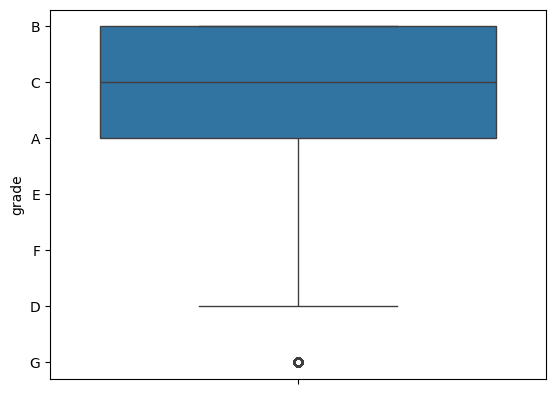

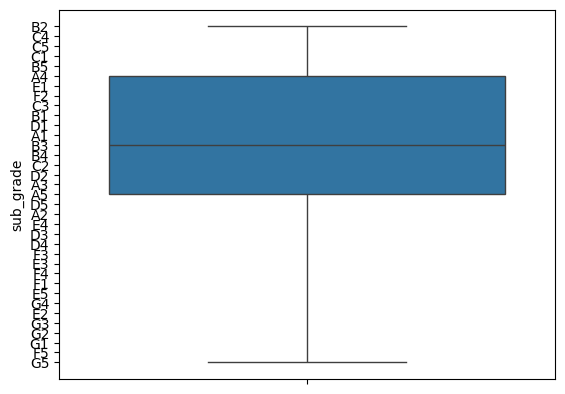

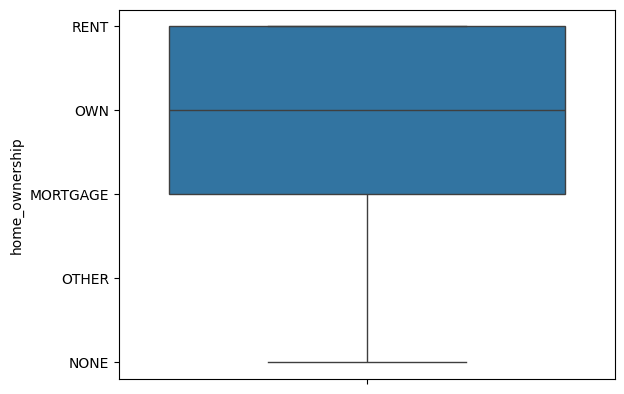

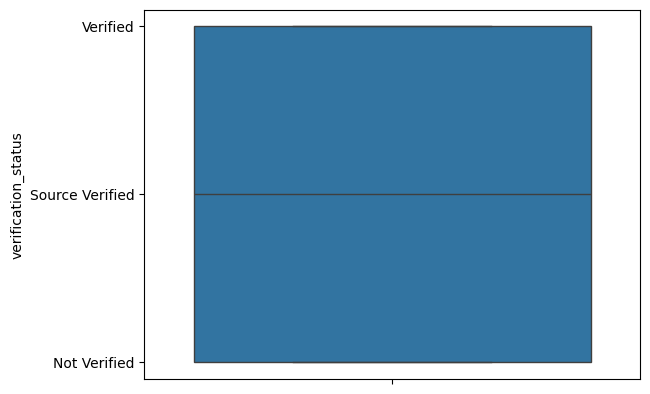

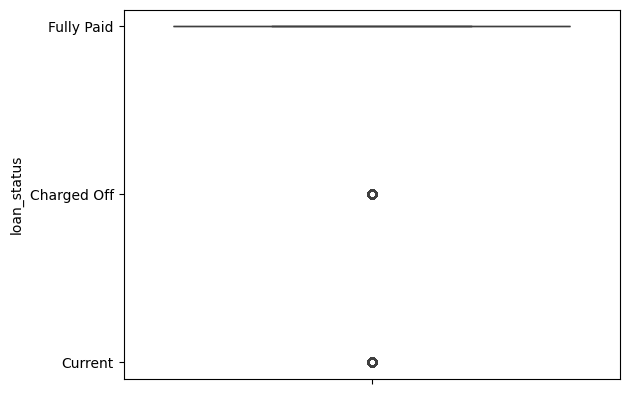

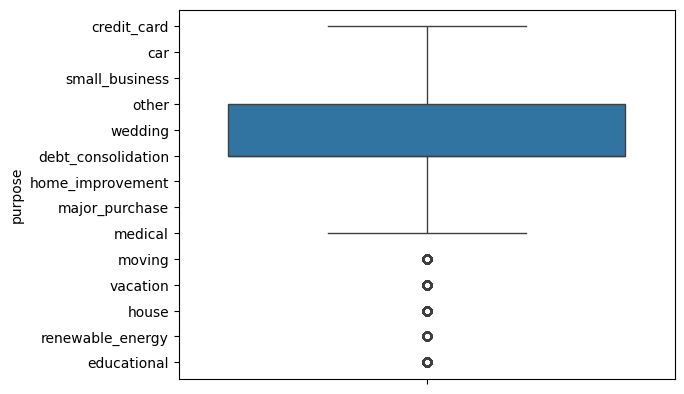

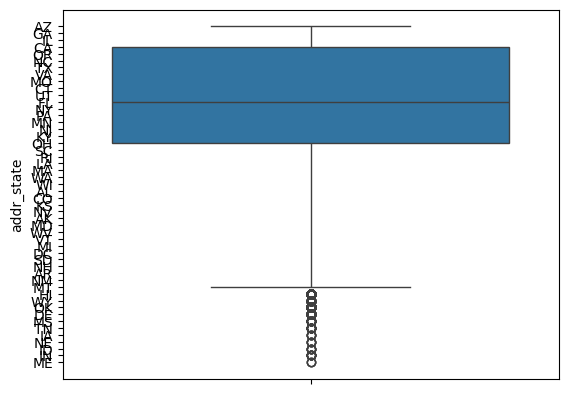

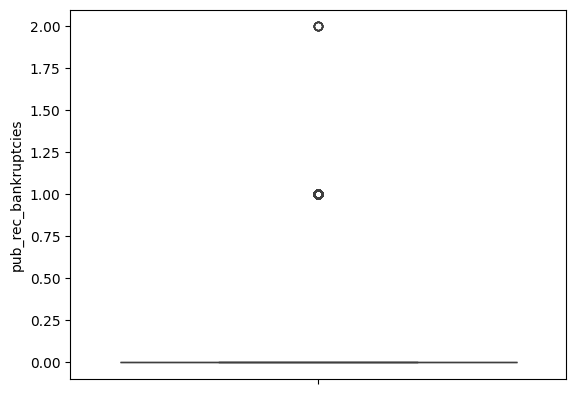

In [51]:
for i in cate_col:
  sns.boxplot(loan[i])
  plt.show()

In [52]:
loan.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0    38036
1     1674
2        7
Name: count, dtype: int64

In [53]:
loan.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

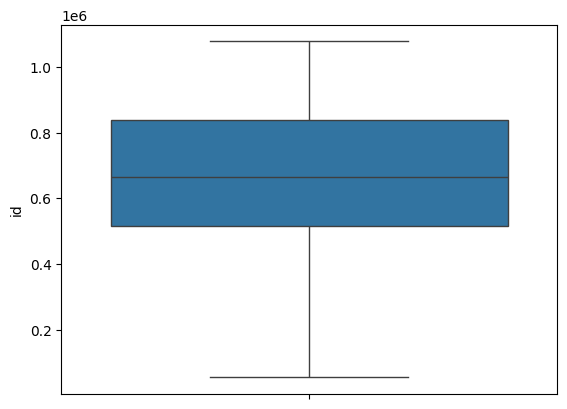

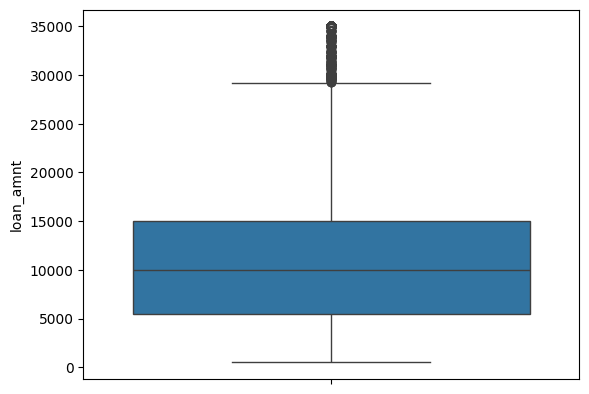

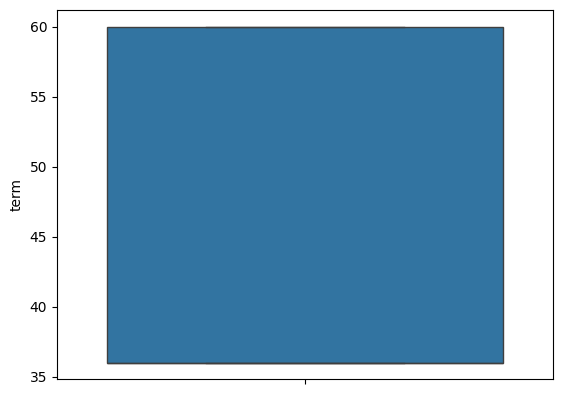

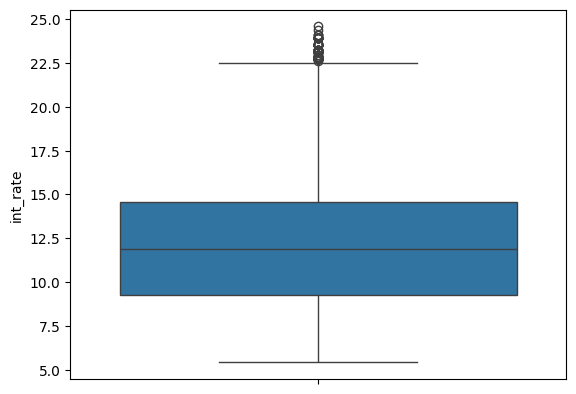

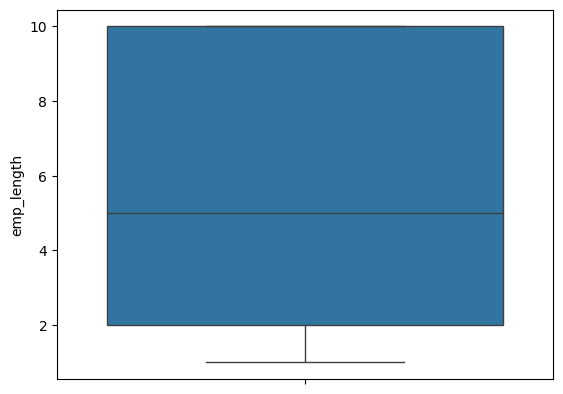

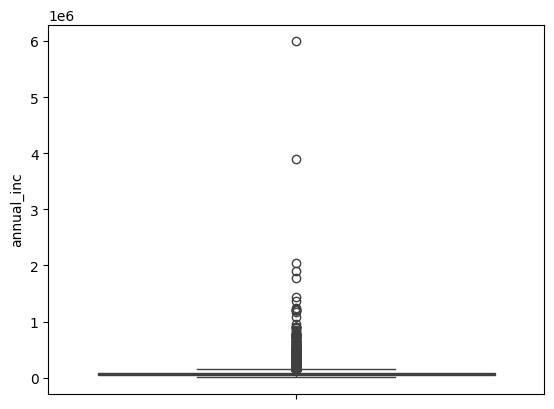

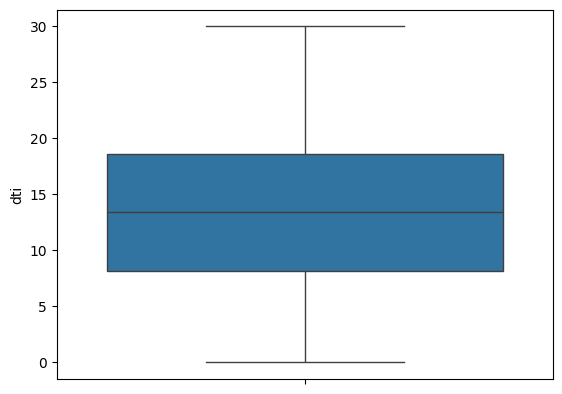

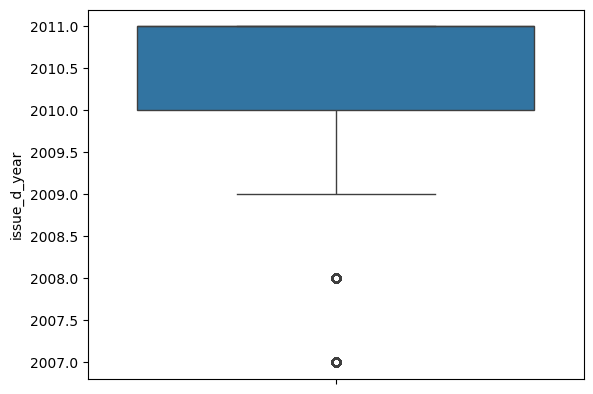

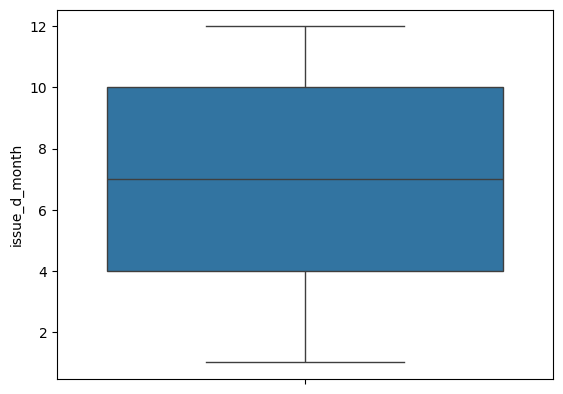

In [54]:
for i in num_col:
  sns.boxplot(loan[i])
  plt.show()

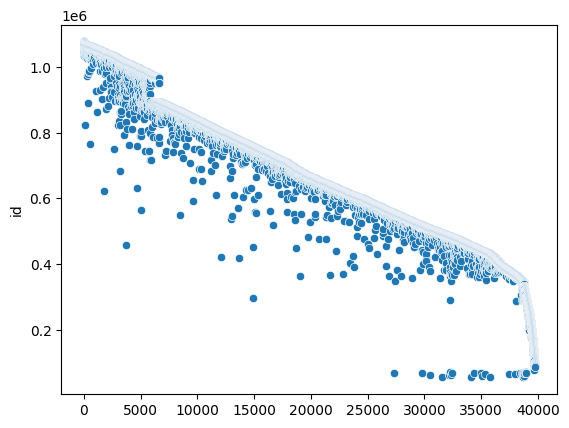

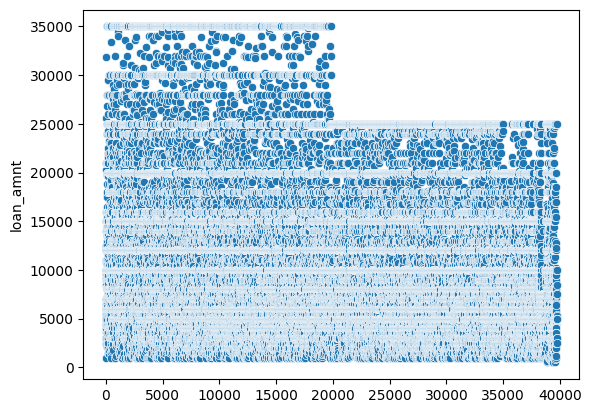

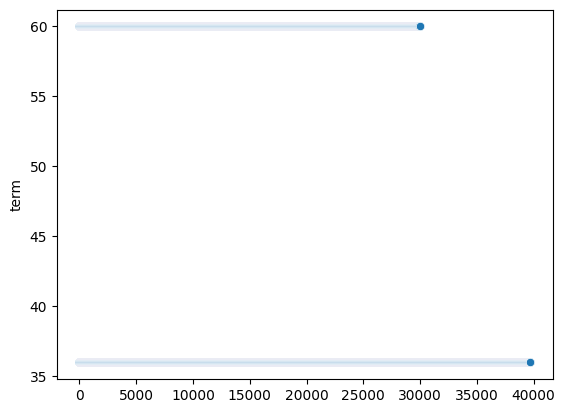

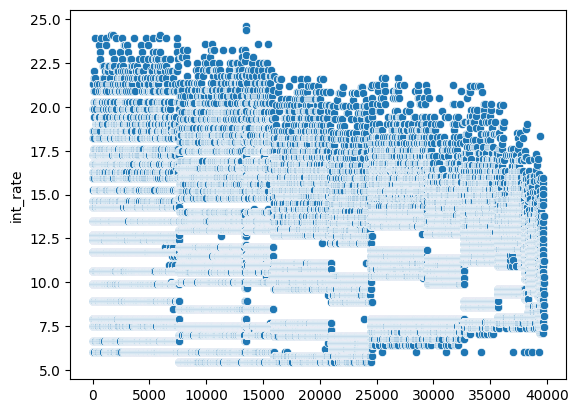

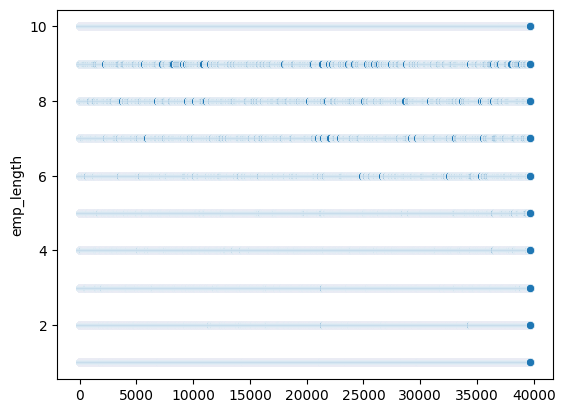

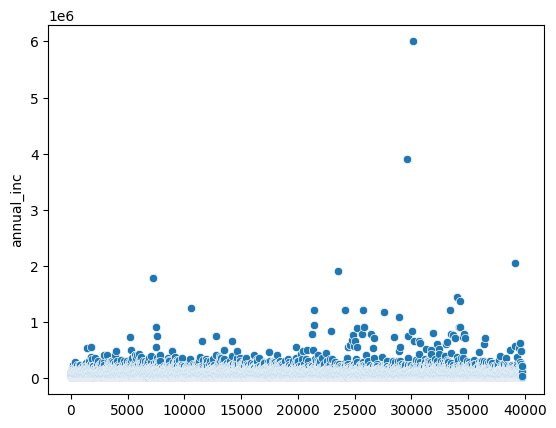

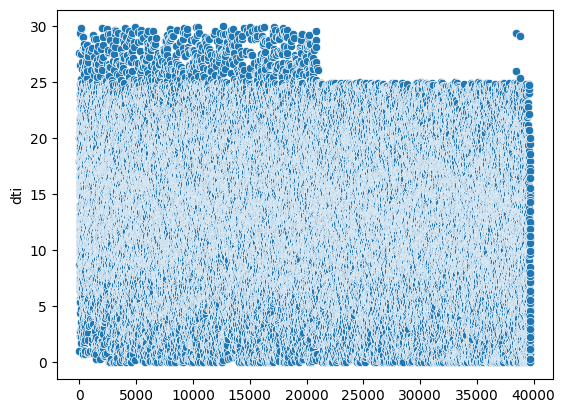

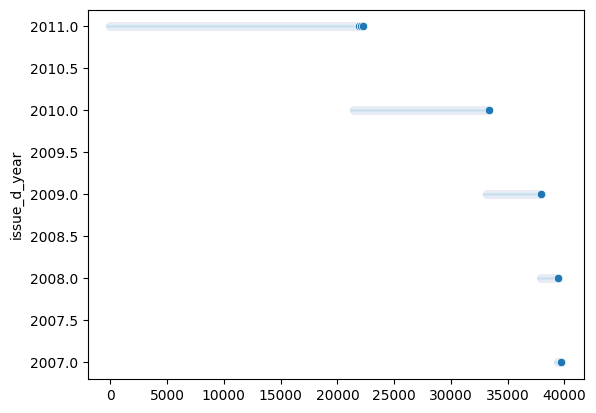

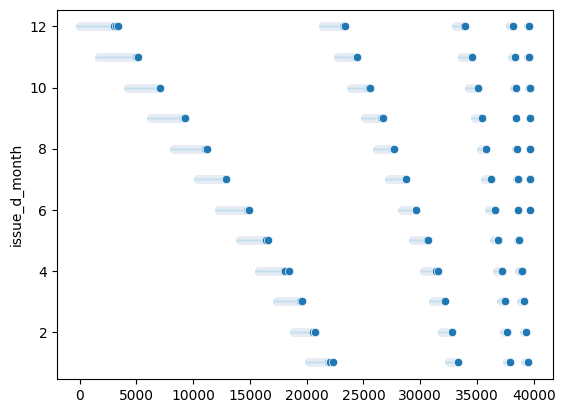

In [55]:
for i in num_col:
  sns.scatterplot(loan[i])
  plt.show()



Above graphs clearly calrifies that we would need to remove outliers for below columns:
* Annual_inc
Reason: Exponantial growth in the salary

Removing the outliers for **Annual_inc**
Note: We choose Interquartile Range (**IQR**) Method:

In [56]:
Q1 = loan['annual_inc'].quantile(0.25)
Q3 = loan['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data
loan = loan[(loan['annual_inc'] >= lower_bound) & (loan['annual_inc'] <= upper_bound)]

<Axes: ylabel='annual_inc'>

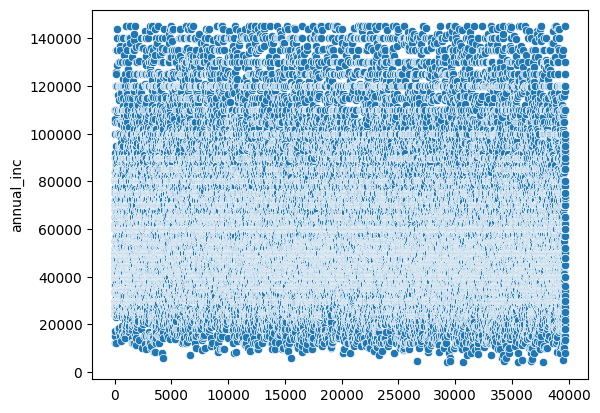

In [57]:
#Validate plot
sns.scatterplot(loan['annual_inc'])

# **One more importand thing and this is the last pre-check before moving further with the EDA analysis**

As mentioned in the problem statment we need to only consider the loan application Fully paid or charged off sicne we can't take any call for the "current" loan_status.

***Ref: We need to understand if an applicant is defaulted or non-defaulted***




Removing the **loan_status** as "*current*"

In [58]:
loan = loan[loan.loan_status!='Current']

Check the shape

In [59]:
loan.shape

(36817, 17)

**It seems all good now and we are ready to proceed with EDA analysis:**


# **Univariate Analysis**

To perform the Univariate Analysis we need to choose the below plots:
hist,box and scatterplot

## **Numerical Columns**

**loan_amnt**

<Axes: ylabel='loan_amnt'>

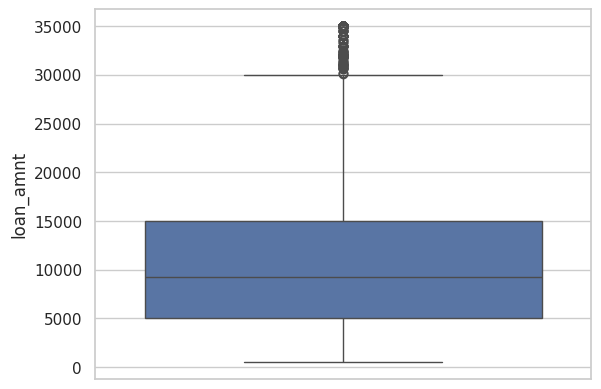

In [60]:
sns.set(style="whitegrid")
sns.boxplot(loan['loan_amnt'])

In [61]:
loan.loan_amnt.describe()

count    36817.000000
mean     10706.805280
std       7067.980083
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

**count  loan_amnt  35802.000000**

**mean loan_amnt    10774.162756**

**std  loan_amnt     7072.286737**

**min   loan_amnt     500.000000**

**25%  loan_amnt     5100.000000**

**50%  loan_amnt     9500.000000**

**75%   loan_amnt   15000.000000**

**max   loan_amnt   35000.000000**

**term**

<Axes: xlabel='term', ylabel='count'>

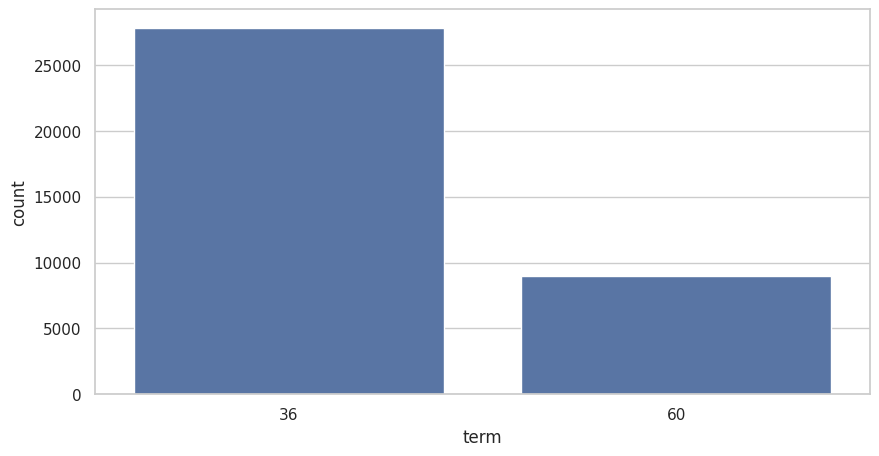

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x='term',data=loan)

In [64]:
loan.term.value_counts()*100/loan.term.count()

term
36    75.61181
60    24.38819
Name: count, dtype: float64

* **~76% of all loan counts are opted 36 months terms which is almost 3/4 of total application**

**int_rate**

<Axes: xlabel='int_rate', ylabel='Density'>

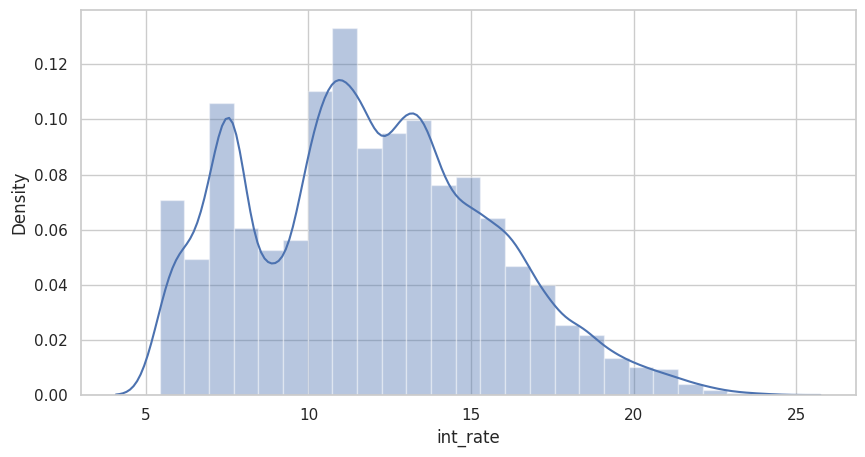

In [65]:
plt.figure(figsize=(10,5))
sns.distplot(loan['int_rate'],bins=25)

In [66]:
loan.int_rate.describe()

count    36817.000000
mean        11.889986
std          3.668766
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

* **Observed that the most of the loan lended between 8 to 16.**
* **11.8% is the mean and highest counts of loan lended with interest rate**



**emp_length**

<Axes: xlabel='emp_length', ylabel='count'>

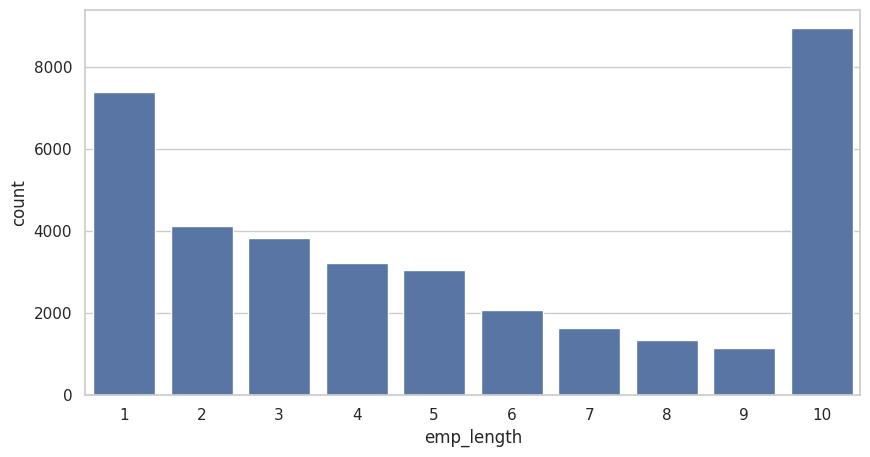

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(x ='emp_length', data = loan)


* **Majority loans are employee either less than 1 year of service OR 10 OR more years of service.**

**annual_inc**

<Axes: xlabel='annual_inc', ylabel='Density'>

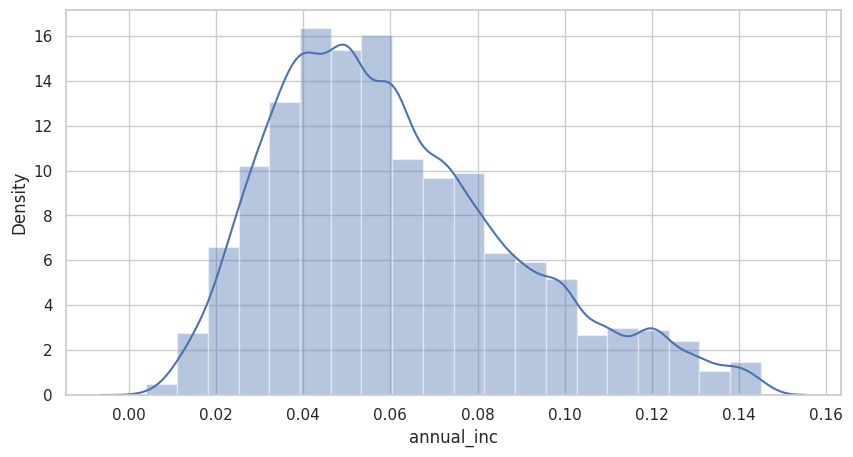

In [68]:
plt.figure(figsize=(10,5))
sns.distplot(loan.annual_inc/1000000,kde=True,bins=20)

* **Majority of borrower has the less income since there was a data skew in the above graph**

**dti**

<Axes: xlabel='dti', ylabel='Density'>

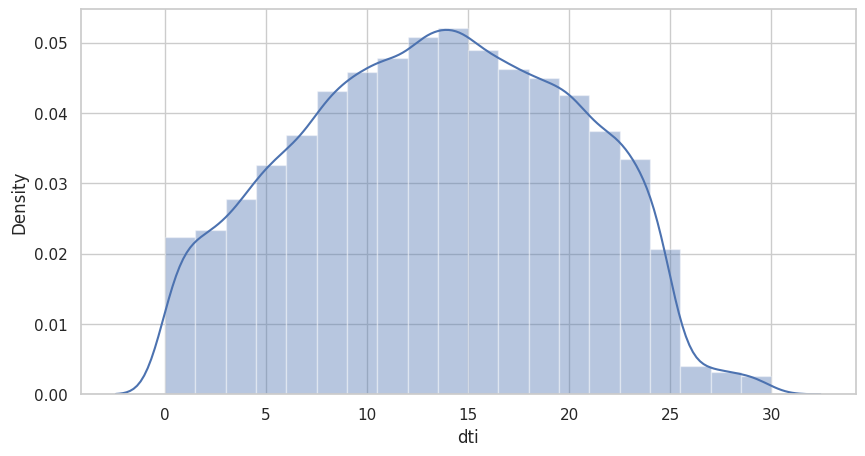

In [69]:
plt.figure(figsize=(10,5))
sns.distplot(loan.dti,kde=True,bins=20)

Text(0.5, 0, 'Debt-to-Income Ratio')

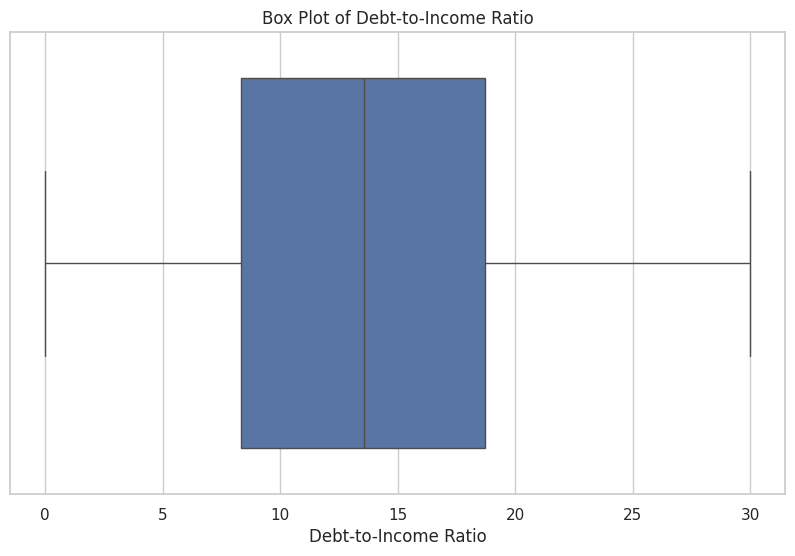

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=loan['dti'])
plt.title('Box Plot of Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')

* **Skew data**
* **The tail on the left side of the distribution is longer or fatter.**

  * **Indicates that there are a few individuals with much lower DTI ratios compared to the majority.**
  * **Most individuals have higher DTI ratios, but there are some with significantly lower ratios, suggesting very well-managed debt levels relative to income in those cases.**



**issue_d_year**

<Axes: xlabel='issue_d_year', ylabel='count'>

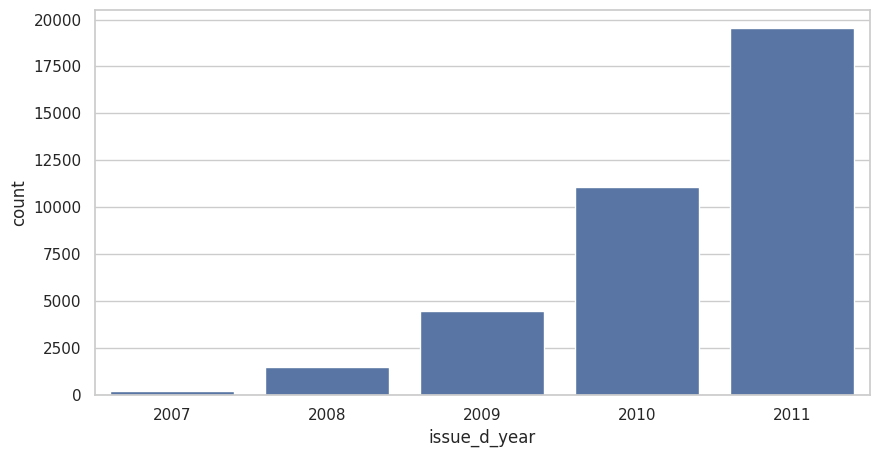

In [71]:
plt.figure(figsize=(10,5))
sns.countplot(x ='issue_d_year', data = loan)


* **Most of the borrowers have loan in 2011 year**
* **We observed every year borrowing loans are increasing**

**issue_d_month**

<Axes: xlabel='issue_d_month', ylabel='count'>

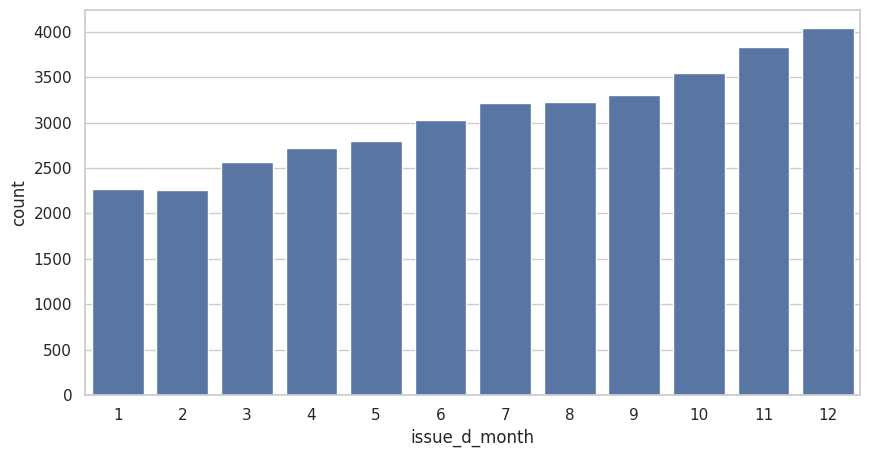

In [72]:
plt.figure(figsize=(10,5))
sns.countplot(x ='issue_d_month', data = loan)


* **There is an incremental growth for laon count for every month of the year**


## **Categorical Columns**

**grade**

<Axes: xlabel='grade', ylabel='count'>

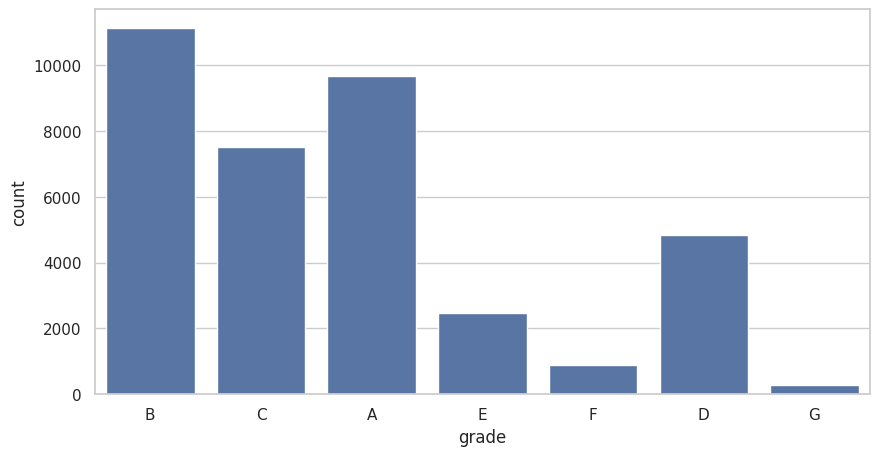

In [73]:
plt.figure(figsize=(10,5))
sns.countplot(x ='grade', data = loan)


* **Hightest borrowers are from the grade B**

**sub_grade**

<Axes: xlabel='sub_grade', ylabel='count'>

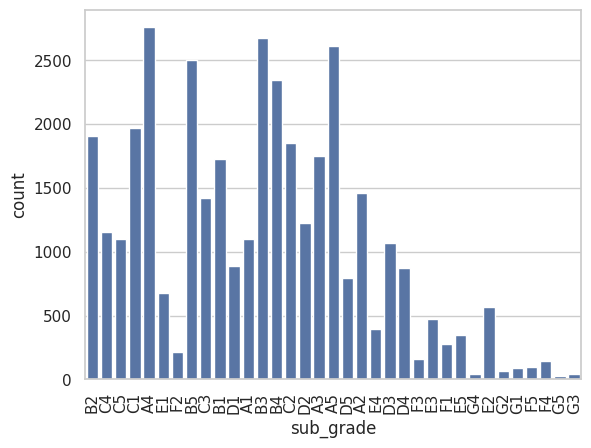

In [74]:
plt.xticks(rotation=90)
sns.countplot(x ='sub_grade', data = loan)



* **A4, B3 and A5 are the highest sub-categories who borrowed the loan**

**home_ownership**

<Axes: xlabel='home_ownership', ylabel='count'>

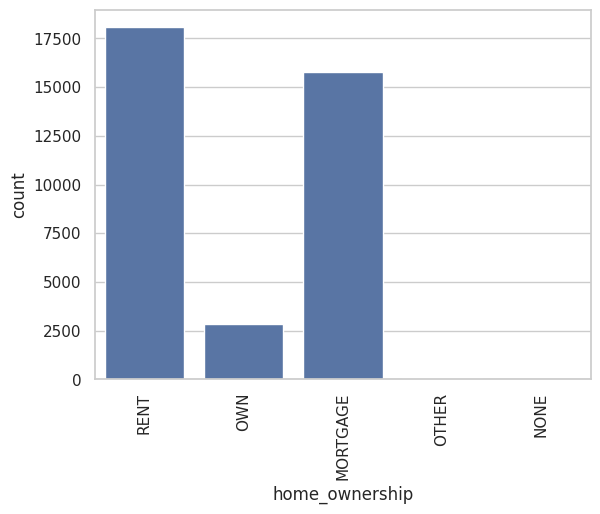

In [75]:
plt.xticks(rotation=90)
sns.countplot(x ='home_ownership', data = loan)

* **Most of the borrowers are rent OR mortgage, Rent home ownership is the highest one.**

**verification_status**

<Axes: xlabel='verification_status', ylabel='count'>

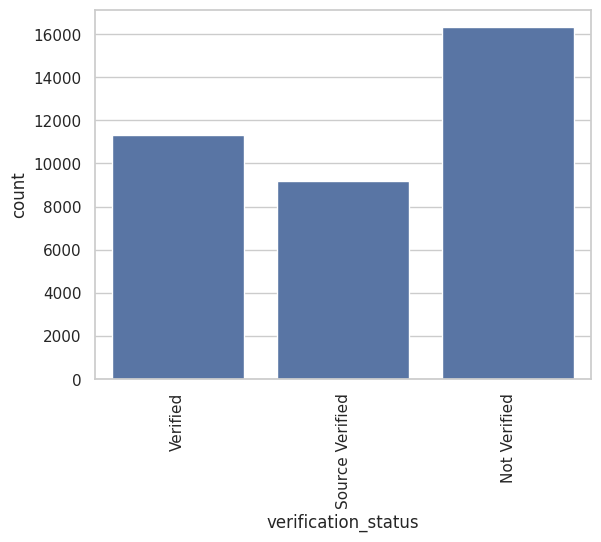

In [76]:
plt.xticks(rotation=90)
sns.countplot(x ='verification_status', data = loan)

* **~16000 borrowers are not verified**

**loan_status**

loan_status
Fully Paid     85.248662
Charged Off    14.751338
Name: count, dtype: float64


<Axes: xlabel='loan_status', ylabel='count'>

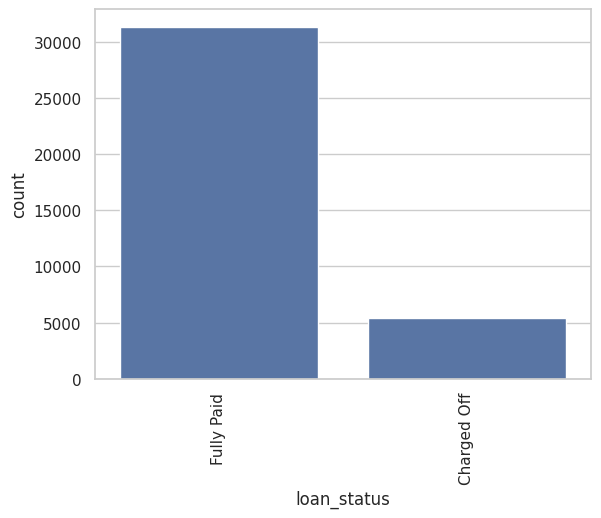

In [77]:
print(loan.loan_status.value_counts()*100/loan.loan_status.count())
plt.xticks(rotation=90)
sns.countplot(x ='loan_status', data = loan)

* **~85% count of loans has the loan_status as "Fully Paid" only ~15% of loans had status as "Charged off", So the default loans are very less compared to the paid "Paid"**

**purpose**

<Axes: xlabel='purpose', ylabel='count'>

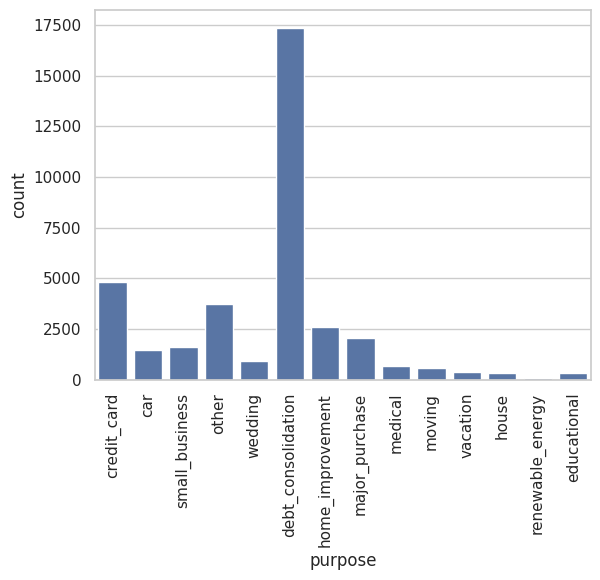

In [78]:
plt.xticks(rotation=90)
sns.countplot(x ='purpose', data = loan)

* **debt_consolidation is the most purpose to borrow the loan**

**addr_state**

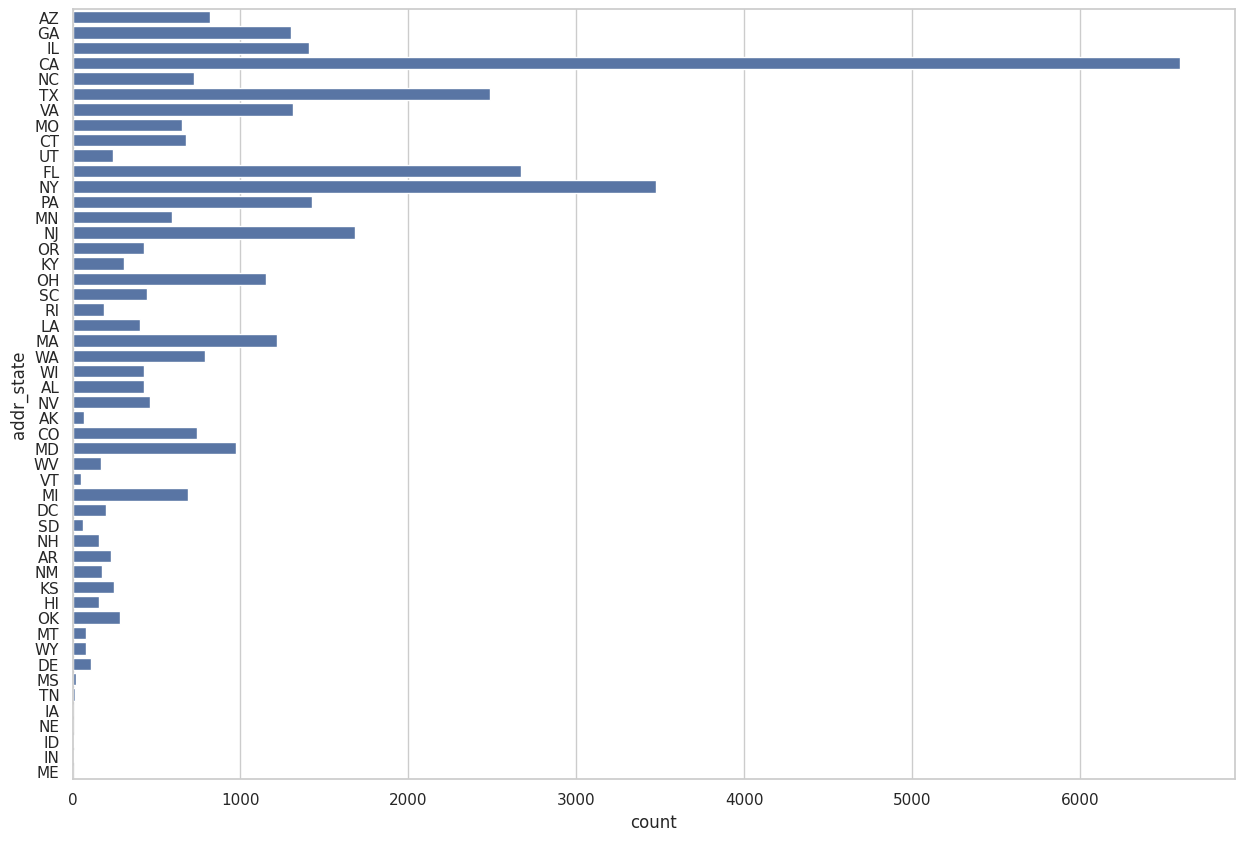

In [79]:
plt.figure(figsize=(15,10))
sns.countplot(loan.addr_state)
plt.show()

* **CA state is having the higest borrowers followed by NY**

**pub_rec_bankruptcies**

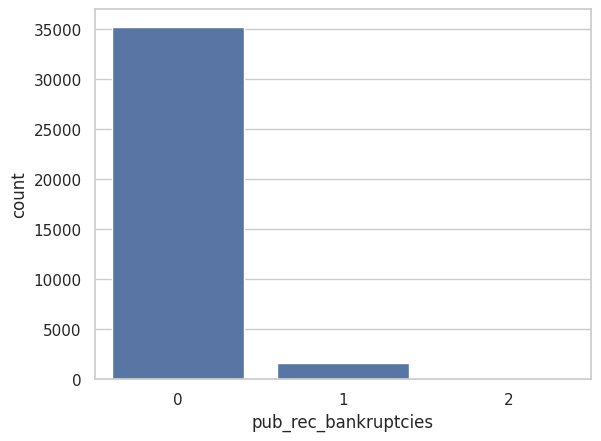

In [80]:

sns.countplot(x='pub_rec_bankruptcies',data=loan)
plt.show()

* **Majority of the borrowers have no record of Public Recorded Bankruptcy.**

# **Univariate Analysis: Inference based on count vs columns**

* Mean loan ammount for the shared datasets is 10774.162756 Min is 500 and Max is 35000
* ~76% of borrowers are with "36 months" terms which is almost 3/4 of total application
* Observed that the most of the loan lended between 8% to 16%.
* 11.9% is the mean and highest counts of loan lended with
* Highest borrower are from more than 10 years of service.
* Majority of borrower has the less income(less than 0.6M) since there was a data skew in the above graph
* Most borrower has high DTI means debts is comparitivity hight to salary
* Most of the borrowers have loan in 2011 year
* Every year borrowing loans are increasing
* There is an incremental growth for laon count for every month of the year
* Hightest borrowers are from the grade B
* A4, B3 and A5 are the highest sub-categories who borrowed the loan
* Most of the borrowers are rent OR mortgage, Rent home ownership is the highest one.
* ~16000 borrowers are not verified
* ~85% count of loans has the loan_status as "Fully Paid" only ~15% of loans had status as "Charged off", So the default loans are very less compared to the paid "Paid"
* debt_consolidation is the most purpose to borrow the loan
* Majority of the borrowers have no record of Public Recorded Bankruptcy.


# **Bivariate Analysis:**

**Since our dicision is based on "loan_status" we will do Bivariate Analysis based on "loan_status"**

**loan_status VS loan_amnt**

**loan_status VS term**

**loan_status VS int_rate**

**loan_status VS emp_length**

**loan_status VS annual_inc**

**loan_status VS dti**

**loan_status VS issue_d_year**

**loan_status VS issue_d_month**

**loan_status VS grade**

**loan_status VS sub-grade**

**loan_status VS home_ownership**

**loan_status VS verification_status**

**loan_status VS purpose**

**loan_status VS addr_state**

**loan_status VS term pub_rec_bankruptcies**




**loan_status VS loan_amnt**

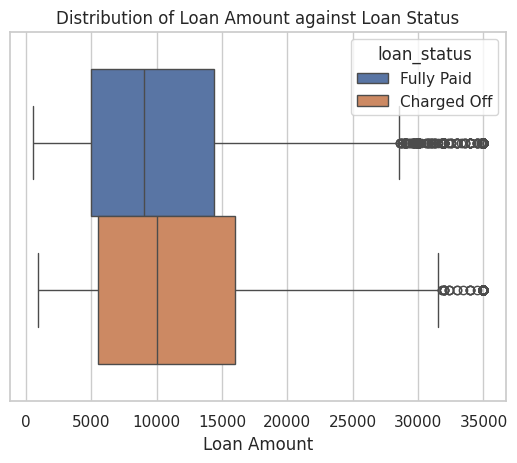

In [81]:
sns.boxplot(data=loan,x='loan_amnt',hue='loan_status')
plt.xlabel('Loan Amount')
plt.title('Distribution of Loan Amount against Loan Status',fontsize=12)
plt.show()

* **Difference in the 75 Percentile indicates that large ammount of loan can cause the defaulting**

**loan_status VS term**

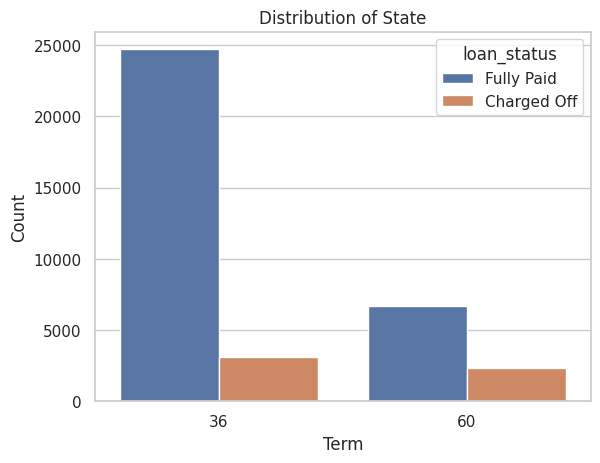

In [82]:
sns.countplot(data=loan,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of State',fontsize=12)
plt.show()

* **Borrowers has 36 Months terms is more safer and less chance to be defaulter. Compares to 60 Months term**

**loan_status VS int_rate**

Text(0.5, 1.0, 'Distribution of Interest Rate For Loan Status')

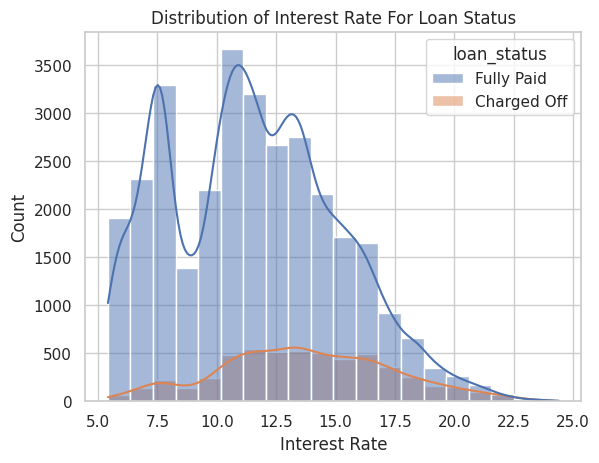

In [83]:
sns.histplot(data=loan,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)

* **Defaulters increasd from 10% interest rate and then decreased after 17% of rate interest.**

**loan_status VS emp_length**

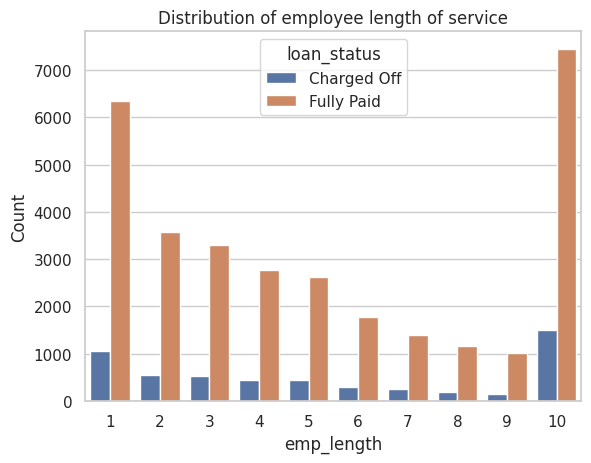

In [84]:
sns.countplot(data=loan,x='emp_length',hue='loan_status')
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.title('Distribution of employee length of service',fontsize=12)
plt.show()

* **Employee less than 1 and higher than 10 years of service leanth has the high number of defaulters**

**loan_status VS annual_inc**

Text(0.5, 1.0, 'Disctibution of employee based on annual income')

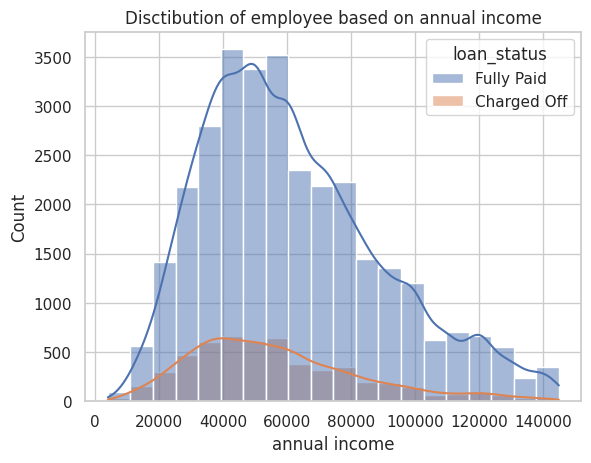

In [85]:
sns.histplot(data=loan,x='annual_inc',hue='loan_status', bins=20, kde=True)
plt.xlabel('annual income')
plt.ylabel('Count')
plt.title('Disctibution of employee based on annual income',fontsize=12)

* **Income between 40000 to 60000 has the high number of charged off and that can leads high number of  defaulters.**
* **After 60000 we see that number of defaulter decreased**

**loan_status VS dti**

Text(0.5, 1.0, 'Disctibution of employee based on dti')

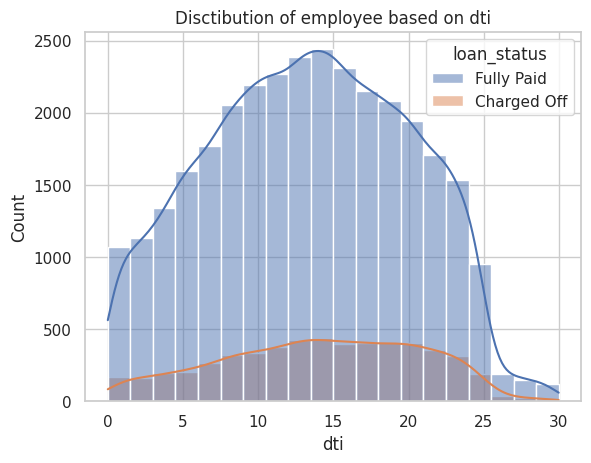

In [86]:
sns.histplot(data=loan,x='dti',hue='loan_status', bins=20, kde=True)
plt.xlabel('dti')
plt.ylabel('Count')
plt.title('Disctibution of employee based on dti',fontsize=12)

* **Skew data, we can see that the loans in DTI ratio 12-17 have higher number of defaulted loan but higher dti has higher chance of defaulting.**

**loan_status VS issue_d_year**

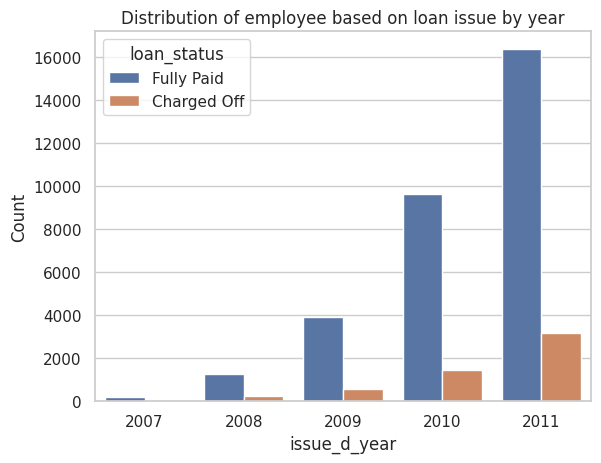

In [87]:
sns.countplot(data=loan,x='issue_d_year',hue='loan_status')
plt.xlabel('issue_d_year')
plt.ylabel('Count')
plt.title('Distribution of employee based on loan issue by year',fontsize=12)
plt.show()

* **Fully Paid exponetial increase compares to charged off**

**loan_status VS issue_d_month**

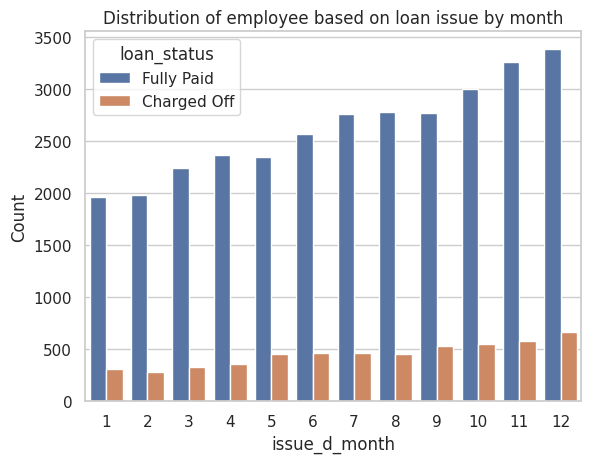

In [88]:
sns.countplot(data=loan,x='issue_d_month',hue='loan_status')
plt.xlabel('issue_d_month')
plt.ylabel('Count')
plt.title('Distribution of employee based on loan issue by month',fontsize=12)
plt.show()

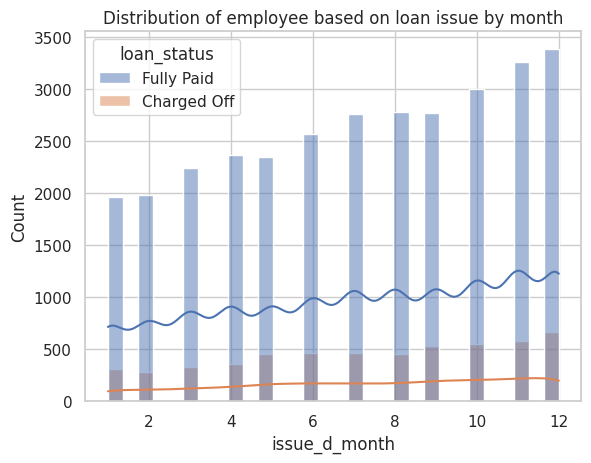

In [89]:
sns.histplot(data=loan,x='issue_d_month',hue='loan_status',kde=True,bins=30)
plt.xlabel('issue_d_month')
plt.ylabel('Count')
plt.title('Distribution of employee based on loan issue by month',fontsize=12)
plt.show()

* **Month 1, 5 and 9 Has the high charged off comaritively similarity Fully paid in the other months**  
* **Month 2,4,7 and 8 has less charged off comparitively similarity Fully paid in the other months**  

**loan_status VS grade**

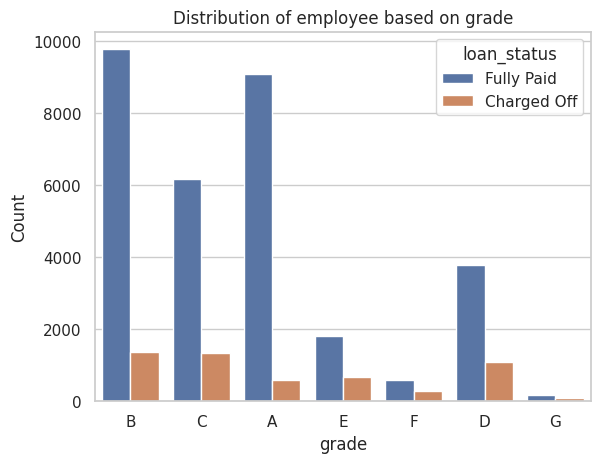

In [93]:
sns.countplot(data=loan,x='grade',hue='loan_status')
plt.xlabel('grade')
plt.ylabel('Count')
plt.title('Distribution of employee based on grade',fontsize=12)
plt.show()

* **Category A and B is good to consider since the charger off is comparitly less.**
* **Category E and F is not consider since the charger off is comparitly high.**

**loan_status VS sub-grade**

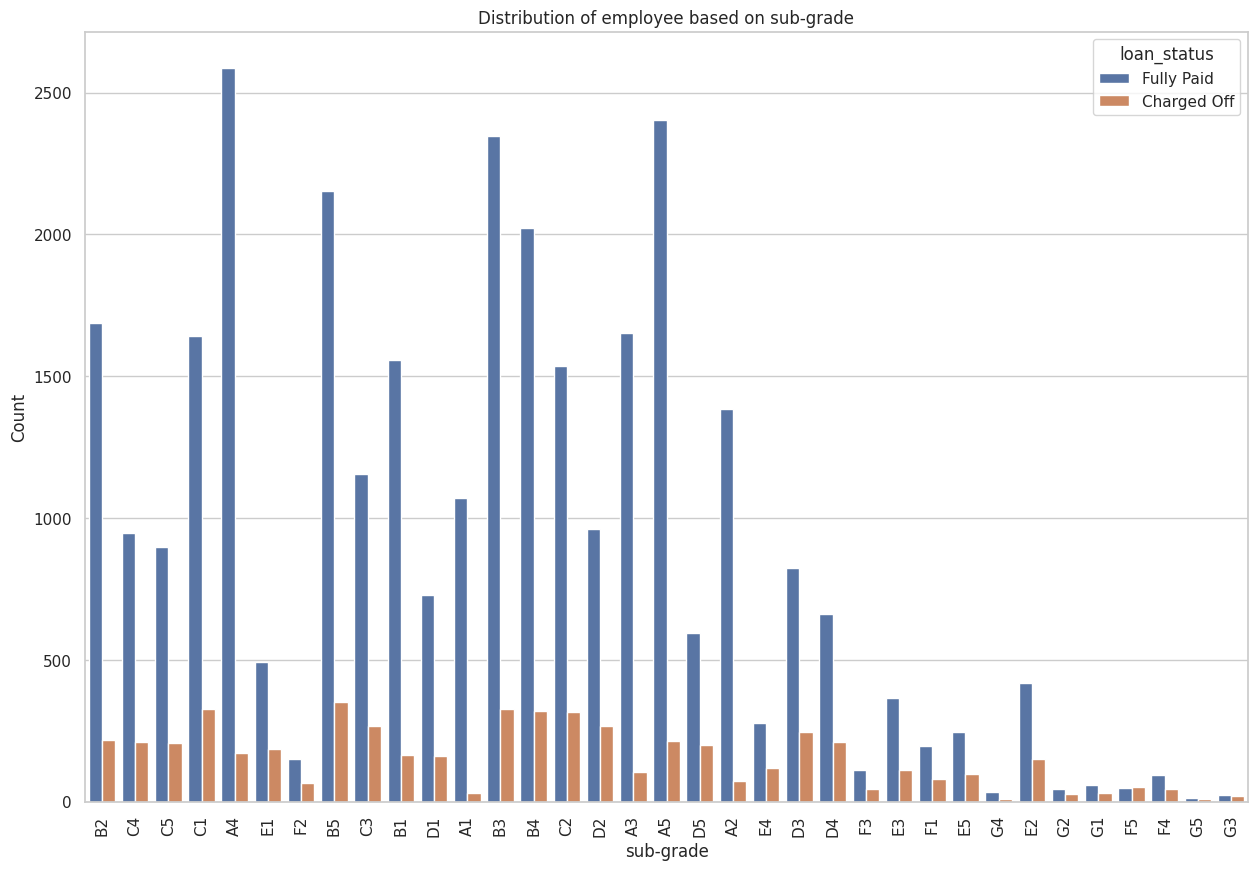

In [94]:
plt.figure(figsize=(15,10))
sns.countplot(data=loan,x='sub_grade',hue='loan_status')
plt.xlabel('sub-grade')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Distribution of employee based on sub-grade',fontsize=12)
plt.show()

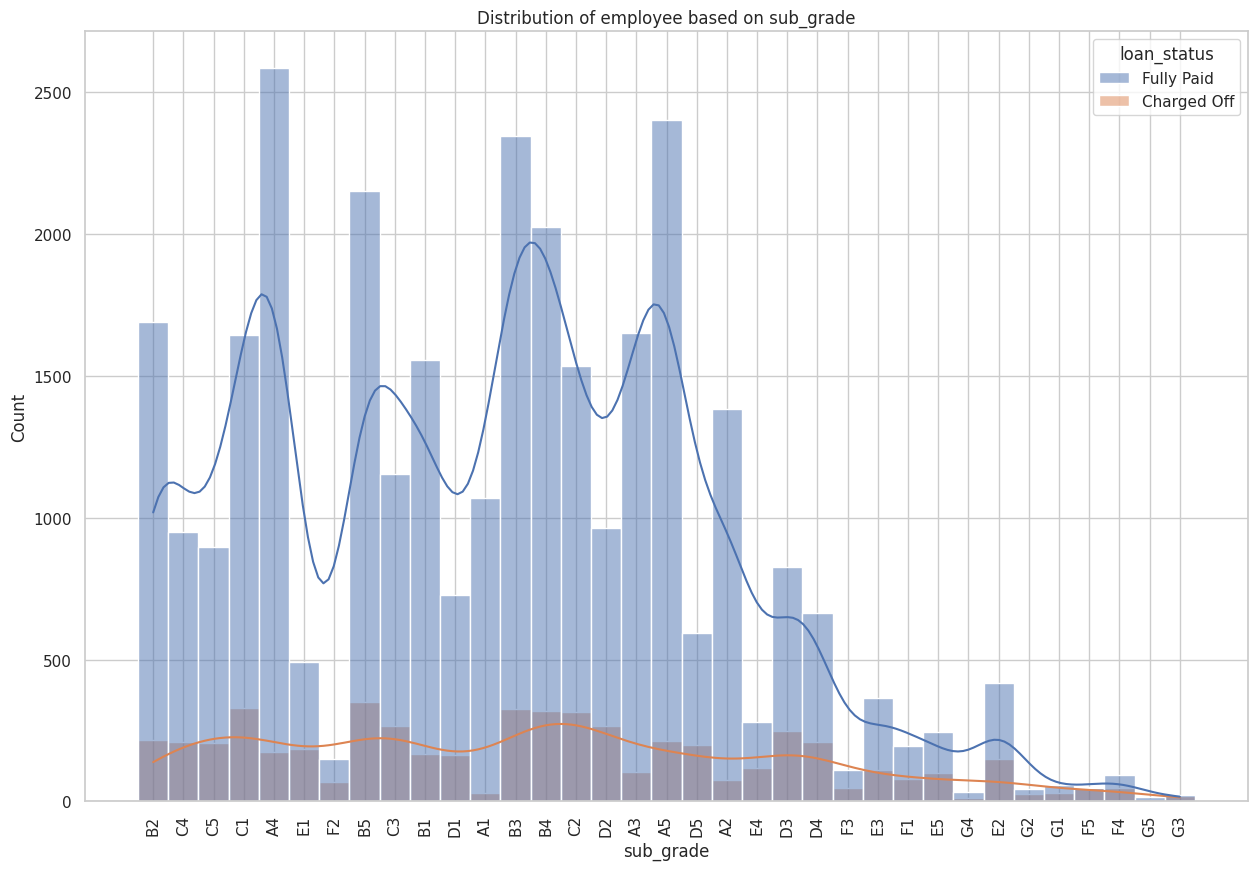

In [95]:
plt.figure(figsize=(15,10))
sns.histplot(data=loan,x='sub_grade',hue='loan_status',kde=True,bins=30)
plt.xlabel('sub_grade')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Distribution of employee based on sub_grade',fontsize=12)
plt.show()

Fully_Paid: **A1,A2,A3,A4 and A5 is Good Comparitively B1 ,B2, B3, B4 and B5**

Defaulters: **E and F still bad, however E is having good count compares to F**

**loan_status VS home_ownership**

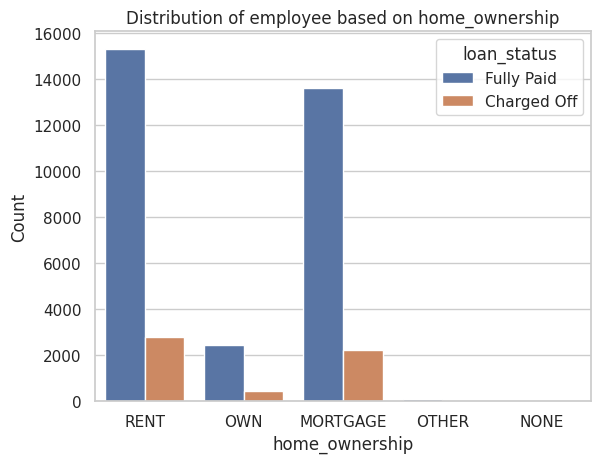

In [96]:
sns.countplot(data=loan,x='home_ownership',hue='loan_status')
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.title('Distribution of employee based on home_ownership',fontsize=12)
plt.show()

* **Result is same as univariate analysis**

**loan_status VS verification_status**

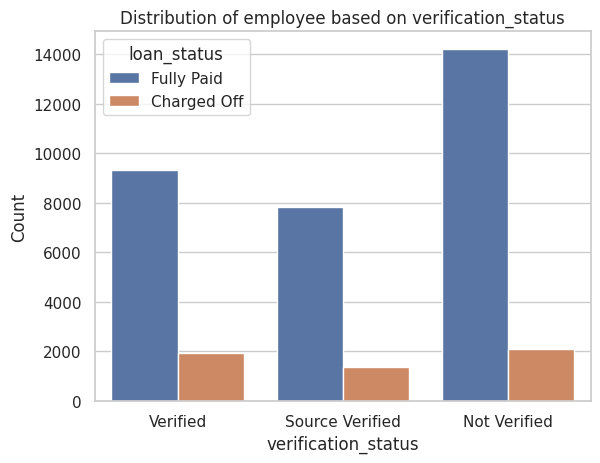

In [97]:
sns.countplot(data=loan,x='verification_status',hue='loan_status')
plt.xlabel('verification_status')
plt.ylabel('Count')
plt.title('Distribution of employee based on verification_status',fontsize=12)
plt.show()

* **Charged off in the not verified is high compares to other**

**loan_status VS purpose**

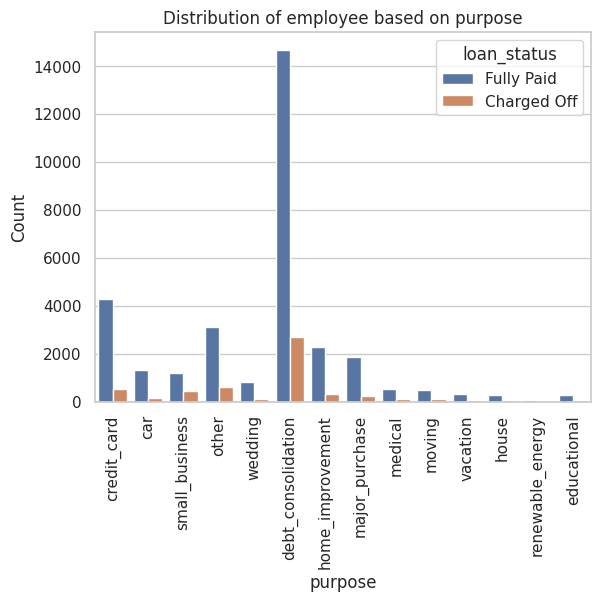

In [98]:
sns.countplot(data=loan,x='purpose',hue='loan_status')
plt.xlabel('purpose')
plt.ylabel('Count')
plt.title('Distribution of employee based on purpose',fontsize=12)
plt.xticks(rotation=90)
plt.show()

* **Along with debt_consolidation car, credit_card are other good purpose**

**loan_status VS addr_state**

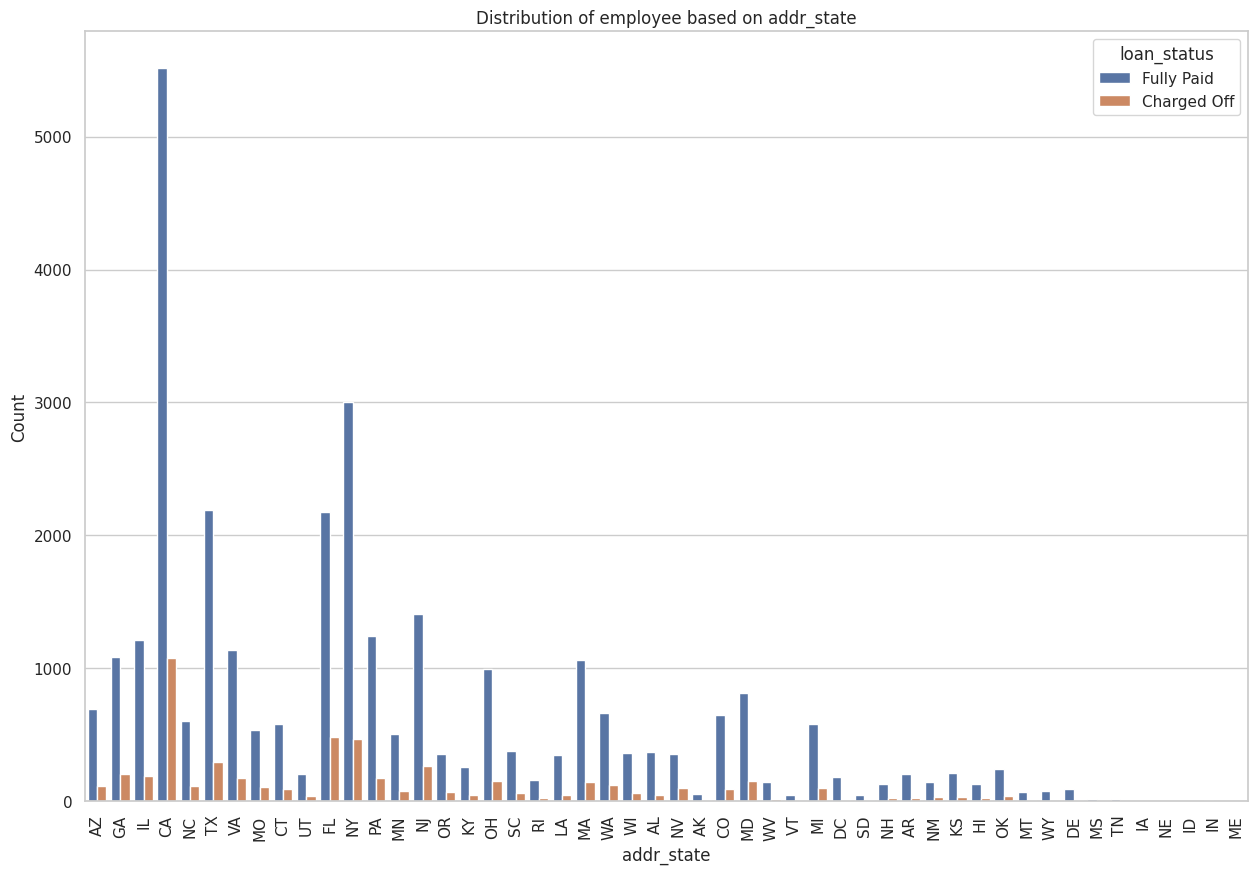

In [105]:
plt.figure(figsize=(15,10))
sns.countplot(data=loan,x='addr_state',hue='loan_status')
plt.xlabel('addr_state')
plt.ylabel('Count')
plt.title('Distribution of employee based on addr_state',fontsize=12)
plt.xticks(rotation=90)
plt.show()

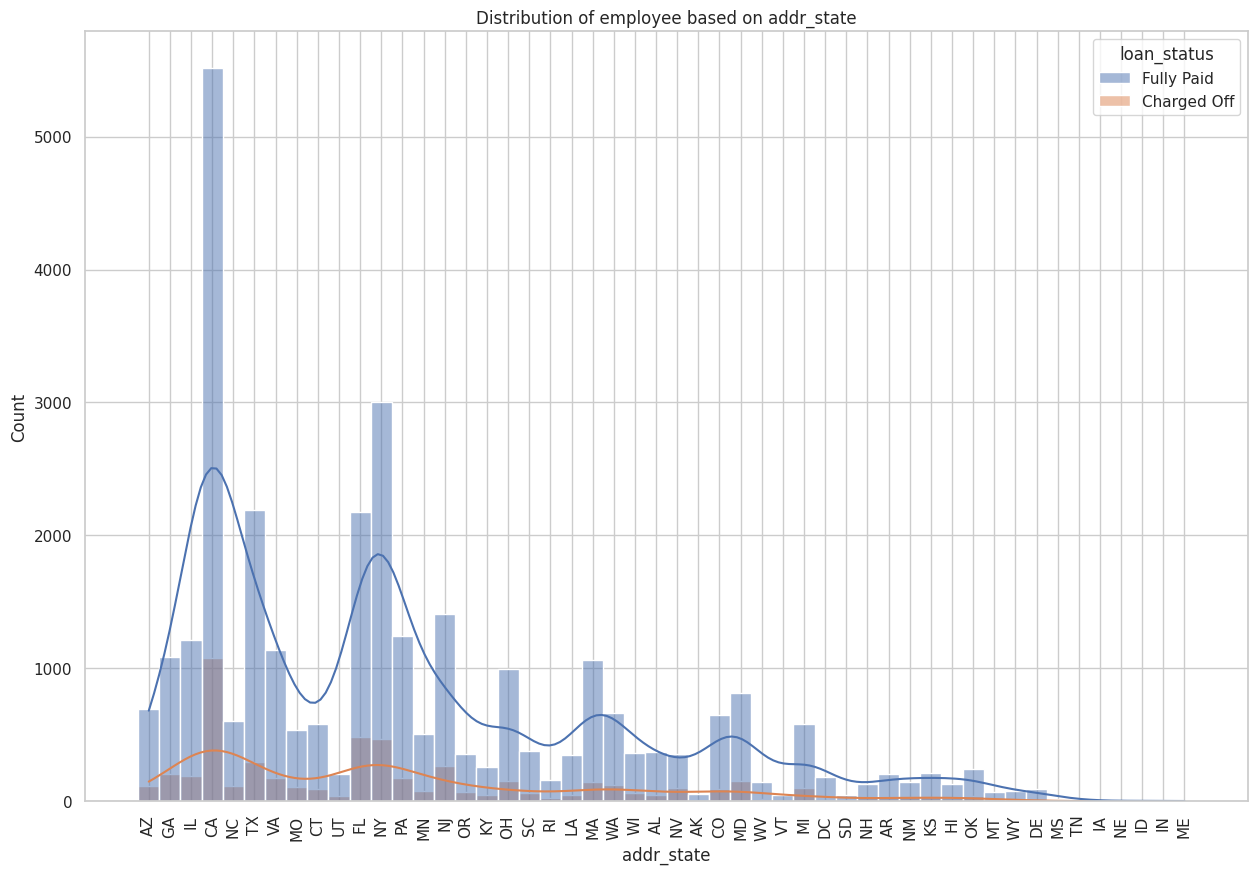

In [101]:
plt.figure(figsize=(15,10))
sns.histplot(data=loan,x='addr_state',hue='loan_status',kde=True,bins=30)
plt.xlabel('addr_state')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Distribution of employee based on addr_state',fontsize=12)
plt.show()

* **Result is almost same as univariate analysis**

**loan_status VS term pub_rec_bankruptcies**

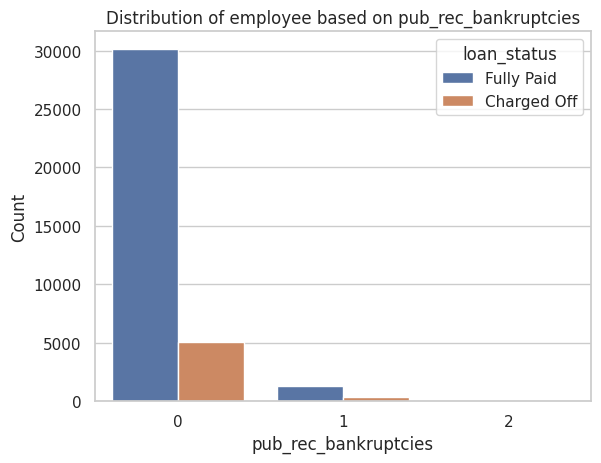

In [100]:
sns.countplot(data=loan,x='pub_rec_bankruptcies',hue='loan_status')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Count')
plt.title('Distribution of employee based on pub_rec_bankruptcies',fontsize=12)
plt.show()

* **Result is same as univariate analysis**

# **Bivariate Analysis: Inference based on columns vs loan_status (cnt)**
* Difference in the 75 Percentile indicates that large ammount of loan can cause the defaulting
* Borrowers has 36 Months terms is more safer and less chance to be defaulter. Compares to 60 Months term
* Fully Paid exponetial increase compares to charged off
* Defaulters increasd from 10% interest rate and then decreased after 17% of rate interest.
* Employee less than 1 and higher than 10 years of service leanth has the high number of defaulters
* Income between 40000 to 60000 has the high number of charged off and that can leads high number of defaulters.
* After 60000 we see that number of defaulter decreased
* Skew data, we can see that the loans in DTI ratio 12-17 have higher number of defaulted loan but higher dti has higher chance of defaulting.
* Month 1, 5 and 9 Has the high charged off comaritively similarity Fully paid in the other months
* Month 2,4,7 and 8 has less charged off comparitively similarity Fully paid in the other months
* Category A and B is good to consider since the charger off is comparitly less.
* Category E and F is not consider since the charger off is comparitly high.
* Fully_Paid: A1,A2,A3,A4 and A5 is Good Comparitively B1 ,B2, B3, B4 and B5
* Defaulters: E and F still bad, however E is having good count compares to F
* Along with debt_consolidation car, credit_card are other good purpose


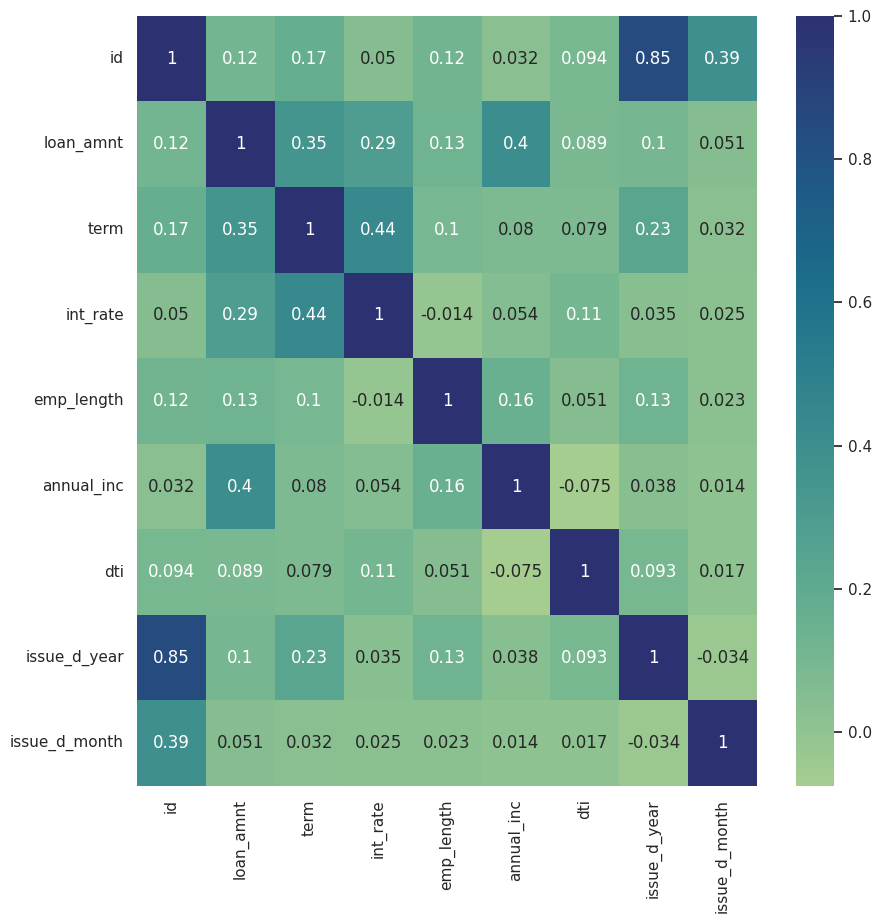

In [102]:
plt.figure(figsize=(10,10))
sns.heatmap(loan[num_col].corr(),annot=True,cmap='crest')
plt.show()


# **Based on the provided analysis, several risk factors for lending loans can be identified:**

**Loan Amount:** Larger loan amounts significantly increase the likelihood of defaulting. Higher-value loans require careful assessment of borrower capacity and stringent risk management practices.

**Loan Term:** Borrowers opting for longer loan terms, such as 60 months, exhibit higher default rates compared to those choosing shorter terms like 36 months. Encouraging borrowers to opt for shorter terms can mitigate default risk.

**Interest Rate:** There's a critical threshold between 10-17% interest rates where the risk of default is heightened. Loans with rates above 10% show increased default rates, peaking before declining again after 17%. Monitoring and managing loans within this range is crucial to mitigate default risks.

**Employment Tenure:** Borrowers with extreme employment tenures, either very new or very experienced, show higher default rates. Targeted risk assessment and mitigation strategies are needed for these groups.

**Income:** Lower-income borrowers, especially those earning between 40,000 and 60,000, exhibit a higher risk of default. Targeted risk management strategies are necessary for this income group.

**Debt-to-Income (DTI) Ratio:** Borrowers with higher DTI ratios are at an increased risk of defaulting. DTI with 12-17 have higher number of defaulted loan but higher dti has higher chance of defaulting.

**Seasonal Trends:** There are seasonal trends in loan borrowing and repayment behavior. Understanding these patterns can help anticipate potential default risks during certain months.

  * Month 1, 5 and 9 Has the high charged off comaritively similarity Fully paid in the other months

  * Month 2,4,7 and 8 has less charged off comparitively similarity Fully paid in the other months

**Loan Grade and Sub-categories:** Grades A and B show favorable performance with lower charge-off rates, while categories E and F demonstrate comparatively higher charge-off rates. Sub-categories A1-A5 and B1-B5 exhibit better repayment records compared to E1-E5 and F1-F5 .

**Loan Purpose:** Debt_consolidation is the primary purpose for borrowing loans. Understanding borrower motivations can help assess their ability to repay.

**Overall Default Rate:** While around 15% of loans have been charged off, the majority (approximately 85%) have been fully paid. Despite this favorable trend, careful risk assessment and management remain essential.

**Verification:**  Unverified borrowers may present higher default risks due to potential inaccuracies in their financial profiles, necessitating additional risk management measures.

**Public Recorded Bankruptcy:** The majority of borrowers and defaulters having no record of public recorded bankruptcy suggests a lower prevalence of extreme financial distress among borrowers. This may indicate a lower overall risk of default compared to populations with higher bankruptcy rates.

Considering these factors collectively and integrating them into the lending decision-making process can help mitigate default risks and ensure responsible lending practices.